In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [2]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]


In [23]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd182040/Nov-05-2024-01-43-56_0.3760154484208762_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed_vmic = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed_vmic = output_trimmed_vmic.reset_index(drop=True)
output_trimmed_vmic = output_trimmed_vmic[~output_trimmed_vmic["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


4.0 0.00018114782983592333 22
4.5 0.00010368385880897786 22
5.0 5.892647655702227e-05 22
5.5 1.3606042632245207e-05 22
6.0 -2.3042304552744278e-05 22
6.5 -6.32090657504667e-05 22


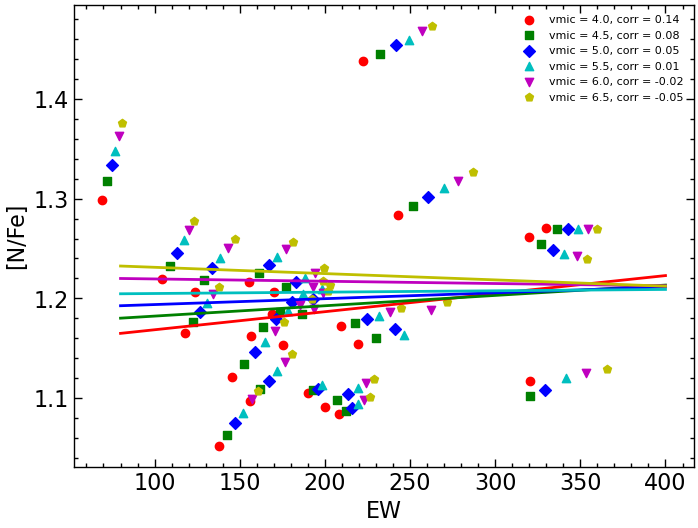

In [25]:
vmics = np.unique(output_trimmed_vmic["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_vmic = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_vmic["ew"])
    nfes = np.array(output_vmic["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.logical_and(np.abs(nfes - mean_nfe) < 3*std_nfe, True))
    choose_idxs = choose_idxs[0]

    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(80, 400, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [22]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-24-2024-13-07-04_0.05164950234595578_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed_vmic = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed_vmic = output_trimmed_vmic.reset_index(drop=True)
output_trimmed_vmic = output_trimmed_vmic[~output_trimmed_vmic["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


5.0 0.0001312040043518841 24
6.5 6.78898813334831e-06 24
8.0 -0.0001560616174450083 22


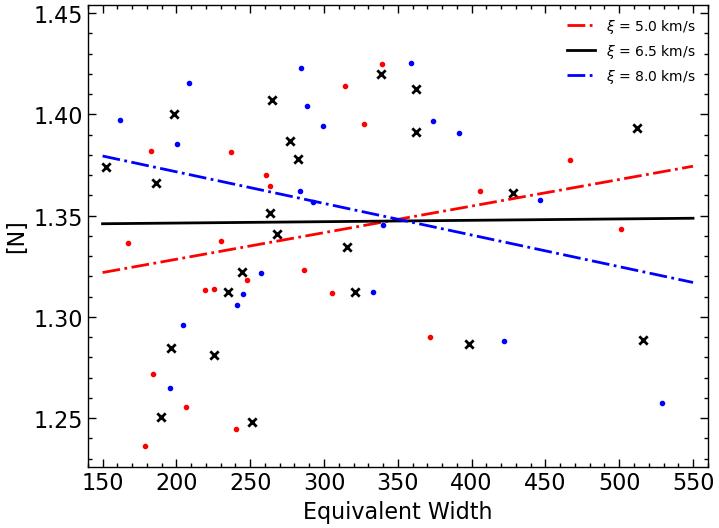

In [48]:

cs = ['r', 'k', 'b']
markers = ['.', 'x', '.']
plot_vmics = [5., 6.5, 8.0]
ls = ['-.', '-', '-.']
i = 0 
for vmic in plot_vmics:

    output_vmic = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_vmic["ew"])
    nfes = np.array(output_vmic["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.abs(nfes - mean_nfe) < 2*std_nfe)
    choose_idxs = choose_idxs[0]
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    full_label = f"vmic = {vmic}, corr = {corr}"
    plt.scatter(ews[::1],nfes[::1], c=cs[i], marker = markers[i])
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(150, 550, 100)
    y = m*x + c
    print(vmic, m, len(nfes))
    plt.plot(x,y, c = cs[i], ls = ls[i], label = rf"$\xi$ = {vmic} km/s")
    plt.legend(fontsize = 10)
    plt.ylabel("[N]")
    plt.xlabel("Equivalent Width")
    plt.xlim(140,560)

    i+=1

In [41]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd182040/Nov-05-2024-03-04-56_0.5596408541981842_LTE_C_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 25])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [42]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD182040.txt,22743.35,22742.0,22744.7,-1.8041,0.0,1.0305,6.0,0.0,0.0,7.797292,259.2061,0,0
1,HD182040.txt,22799.60,22798.0,22801.2,-0.8967,0.0,1.1094,6.0,0.0,0.0,10.484686,262.6223,0,0
2,HD182040.txt,22804.50,22802.0,22807.0,-2.5000,0.0,0.9773,6.0,0.0,0.0,23.142104,404.0687,0,10000000
4,HD182040.txt,23067.25,23065.0,23069.5,-1.8025,0.0,0.9617,6.0,0.0,0.0,6.996587,363.8899,0,0


In [43]:
(solar_abundances['C'] + np.mean(output_trimmed["C_Fe"])).round(3)

np.float64(9.58)

In [44]:
np.std((output_trimmed["C_Fe"]))

np.float64(0.057715871950443566)

In [45]:
solar_abundances['N'] + np.mean(output_trimmed["N_Fe"])

KeyError: 'N_Fe'

In [46]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd182040/Nov-05-2024-03-06-49_0.9998507149655055_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [47]:
np.mean(output_trimmed["chi_squared"])

np.float64(7.10211339084528)

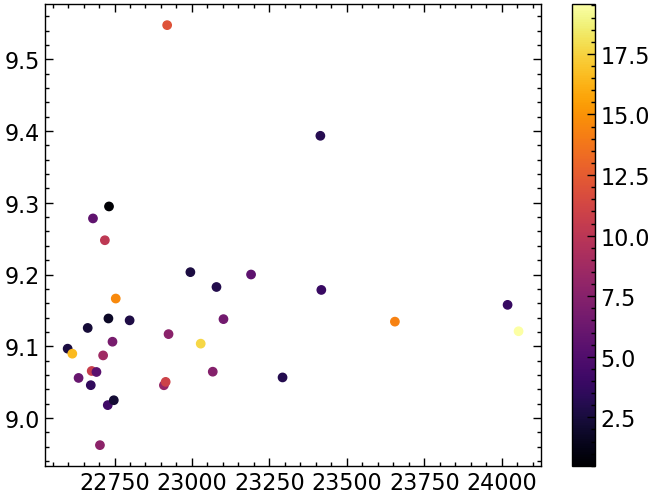

In [48]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['N_Fe']+7.98, c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [49]:
(7.98+np.mean(output_trimmed['N_Fe'])).round(3), np.std(output_trimmed['N_Fe']).round(3)

(np.float64(9.138), np.float64(0.112))

In [60]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/hd182040/vmac', sep='  ')
fitlist

/tmp/ipykernel_94455/1623727015.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/hd182040/vmac', sep='  ')


,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),A(Fe),A(N),A(Mg),A(S),A(Si),A(Na),oisorat
0,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.5


In [66]:
rats = np.arange(0.35, 0.7,0.01)
rats = np.repeat(rats, 4)
rats

array([0.35, 0.35, 0.35, 0.35, 0.36, 0.36, 0.36, 0.36, 0.37, 0.37, 0.37,
       0.37, 0.38, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.39, 0.4 , 0.4 ,
       0.4 , 0.4 , 0.41, 0.41, 0.41, 0.41, 0.42, 0.42, 0.42, 0.42, 0.43,
       0.43, 0.43, 0.43, 0.44, 0.44, 0.44, 0.44, 0.45, 0.45, 0.45, 0.45,
       0.46, 0.46, 0.46, 0.46, 0.47, 0.47, 0.47, 0.47, 0.48, 0.48, 0.48,
       0.48, 0.49, 0.49, 0.49, 0.49, 0.5 , 0.5 , 0.5 , 0.5 , 0.51, 0.51,
       0.51, 0.51, 0.52, 0.52, 0.52, 0.52, 0.53, 0.53, 0.53, 0.53, 0.54,
       0.54, 0.54, 0.54, 0.55, 0.55, 0.55, 0.55, 0.56, 0.56, 0.56, 0.56,
       0.57, 0.57, 0.57, 0.57, 0.58, 0.58, 0.58, 0.58, 0.59, 0.59, 0.59,
       0.59, 0.6 , 0.6 , 0.6 , 0.6 , 0.61, 0.61, 0.61, 0.61, 0.62, 0.62,
       0.62, 0.62, 0.63, 0.63, 0.63, 0.63, 0.64, 0.64, 0.64, 0.64, 0.65,
       0.65, 0.65, 0.65, 0.66, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.67,
       0.68, 0.68, 0.68, 0.68, 0.69, 0.69, 0.69, 0.69])

In [67]:
len(rats)

140

In [68]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = rats
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),A(Fe),A(N),A(Mg),A(S),A(Si),A(Na),oisorat
0,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.35
1,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.35
2,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.35
3,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.35
4,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.68
136,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.69
137,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.69
138,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.69


In [69]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/hd182040/fitlist_comb', sep=' ', index=False)

In [167]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-15-56-09_0.9324879596047584_LTE_O_1D/output'
# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-23-13-22_0.35833114159931434_LTE_O_1D/output"
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-10-19-06_0.7760709184924286_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')


In [168]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [169]:
np.max(df_fine['Doppler_Shift_add_to_RV'])

np.float64(-0.3113629194376325)

In [170]:
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
rvs = []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    rv = np.mean(subdf['Doppler_Shift_add_to_RV'])
    rvs.append(rv)
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

0.52 -0.11 0.14


Text(0.5, 0, '16O/18O ratio')

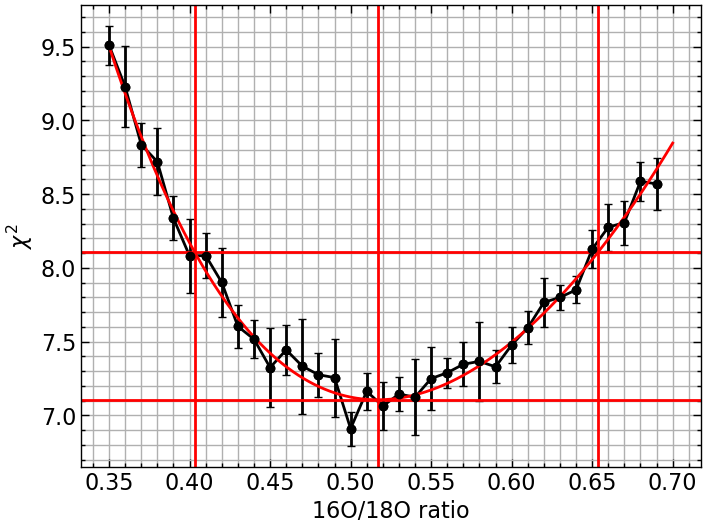

In [171]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(0.35,0.7,1000)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


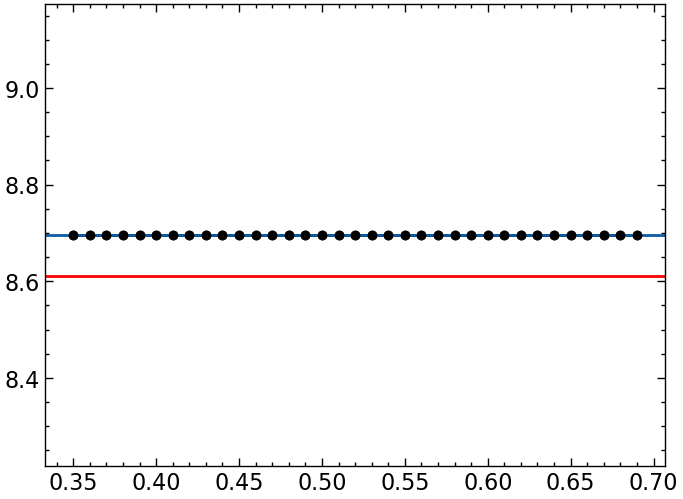

In [165]:
plt.plot(rats, np.array(oabunds)+8.77, 'ko-')
plt.errorbar(rats, np.array(oabunds)+8.77, yerr=doabunds, fmt='ko', capsize=3)
plt.axhline(8.695)
# plt.axhline(8.81, color='r')
plt.axhline(8.695-0.084, color='r')
# plt.axhline(8.81+0.1, color='r')
# plt.axvline(0.52)

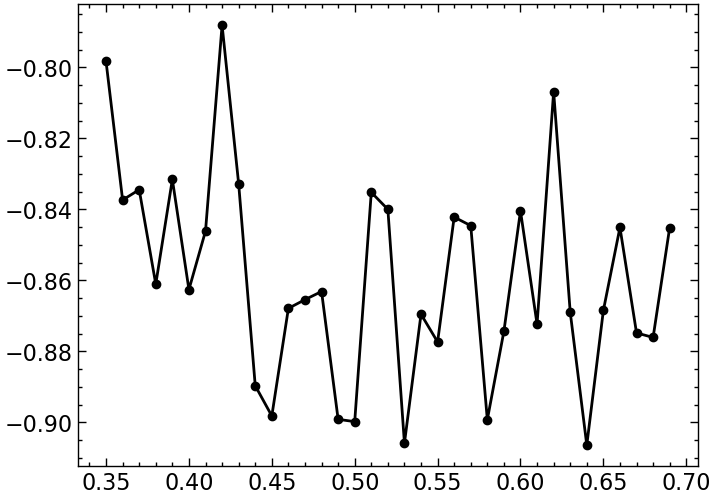

In [166]:
plt.plot(rats, rvs, 'ko-')

In [129]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-18-2024-11-15-46_0.5778776628396651_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


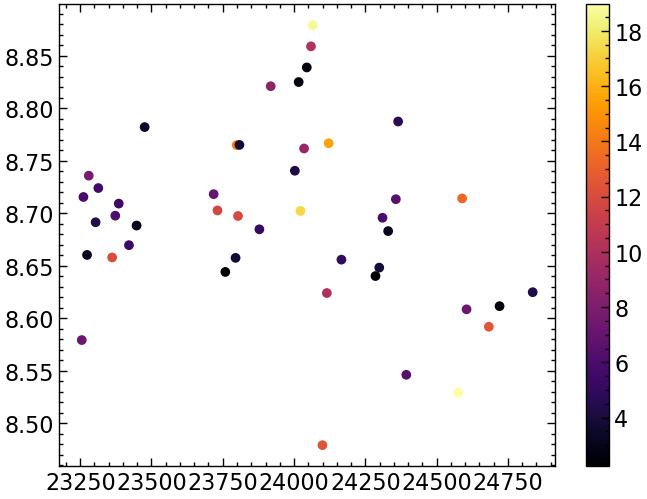

In [130]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [131]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.695), np.float64(0.084))

In [135]:
np.mean(output_trimmed['O_Fe'])

np.float64(-0.07461111111111111)

In [10]:
def printexp(n, exp, filt, howmany):
    strn = f"{exp}+"*n
    strn = strn[:-1]
    strf = f"{filt}+"*n
    strf = strf[:-1]
    strh = f"{howmany}+"*n
    strh = strh[:-1]
    print(f"-filt '{strf}' -exp '{strn}' -noexp '{strh}' ")
    t_total = exp*howmany*n
    print(f"Total time = {t_total} secs")
    t_block = exp*howmany
    print(f"Time per block = {t_block} secs")


In [16]:
printexp(2, 40, "g", 4)

-filt 'g+g' -exp '40+40' -noexp '4+4' 
Total time = 320 secs
Time per block = 160 secs


In [3]:
sudo python make_too.py -ra '17:39:57.0' -dec '3:32:35.6' -ra_rate '0.061' -dec_rate '0.003' -filt 'i+i' -exp '40+40' -noexp '4+4' -name 'CK23A030' -p '7950' -obs_type 'NS' -domesleep '50' -d '20241028' -iit_obs 'advait' -hanle_obs 'kaysang' -stack 'N' -propnums 'P06'

SyntaxError: invalid syntax (1665923938.py, line 1)

In [4]:
rsync -chavzP -e 'ssh -o "ProxyCommand ssh -oHostKeyAlgorithms=+ssh-dss -A growth-crest@117.252.85.44 -W %h:%p"' 'iiap@195.167.1.145:/home/iiap/20241020/Raw/CK23A030/20241018131-510-RA.fits' .

SyntaxError: invalid syntax (4244974217.py, line 1)

In [2]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [3]:
target_ra = '17:41:54.8'
target_dec = '3:33:13.0'
target_coords = SkyCoord(ra=target_ra, dec=target_dec, unit=(u.hourangle, u.deg))

In [4]:
actual_ra, actual_dec = (265.969, 3.564)
actual_coords = SkyCoord(ra=actual_ra, dec=actual_dec, unit=(u.deg, u.deg))

In [5]:
target_coords, actual_coords

(<SkyCoord (ICRS): (ra, dec) in deg
     (265.47833333, 3.55361111)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (265.969, 3.564)>)

In [6]:
# find offset between actual and target
ra_diff = actual_coords.ra - target_coords.ra
dec_diff = actual_coords.dec - target_coords.dec
ra_diff, dec_diff

(<Angle 0.49066667 deg>, <Angle 0.01038889 deg>)

In [7]:
# find separation between actual and target
sep = actual_coords.separation(target_coords)
sep

<Angle 0.48983065 deg>

In [8]:
target_coords_new = SkyCoord(ra=target_coords.ra - ra_diff, dec=target_coords.dec - dec_diff, unit=(u.deg, u.deg))
target_coords_new

<SkyCoord (ICRS): (ra, dec) in deg
    (264.98766667, 3.54322222)>

In [9]:
# format with colons and remove hms dms
target_coords_new.ra.to_string(u.hourangle, sep=':', precision=1), target_coords_new.dec.to_string(u.deg, sep=':', precision=1)

(np.str_('17:39:57.0'), np.str_('3:32:35.6'))

In [13]:
target_ra = '16:03:18.0'
target_dec = '1:51:46.0'
target_coords = SkyCoord(ra=target_ra, dec=target_dec, unit=(u.hourangle, u.deg))

In [14]:
actual_ra, actual_dec = (242.239, 1.984)
actual_coords = SkyCoord(ra=actual_ra, dec=actual_dec, unit=(u.deg, u.deg))

In [15]:
# find offset between actual and target
ra_diff = actual_coords.ra - target_coords.ra
dec_diff = actual_coords.dec - target_coords.dec


In [16]:
ra_diff, dec_diff

(<Angle 1.414 deg>, <Angle 0.12122222 deg>)